<h1>Problema 4</h1>
Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

problema 1 - durata anilor de studii universitare, vechimea in programare <br>
problema 2 - valorile pixelilor din imagini <br>
problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii. <br>

                                                  Q4  Q4_mapped  Q4_clipped
0  What is the highest level of formal education ...        NaN         NaN
1                                  Bachelor’s degree        3.0         3.0
2                                    Master’s degree        2.0         2.0
3                                    Master’s degree        2.0         2.0
4                                    Doctoral degree        3.0         3.0


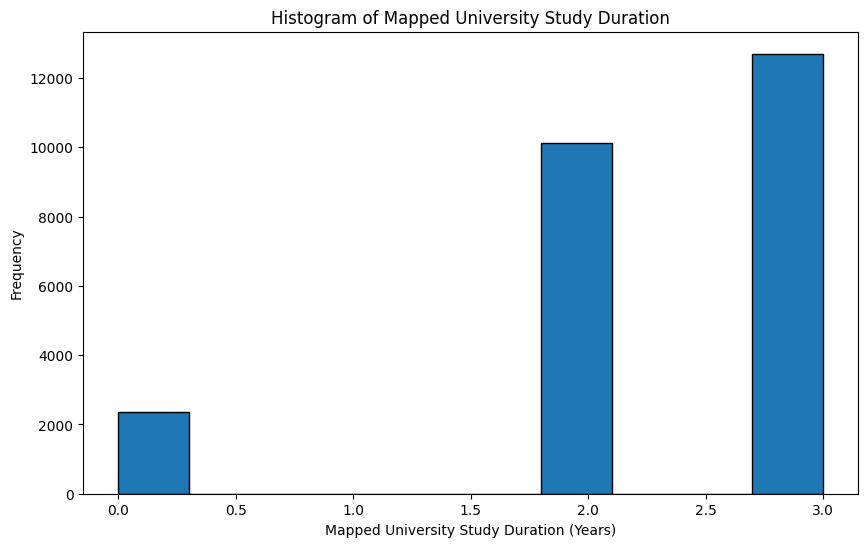

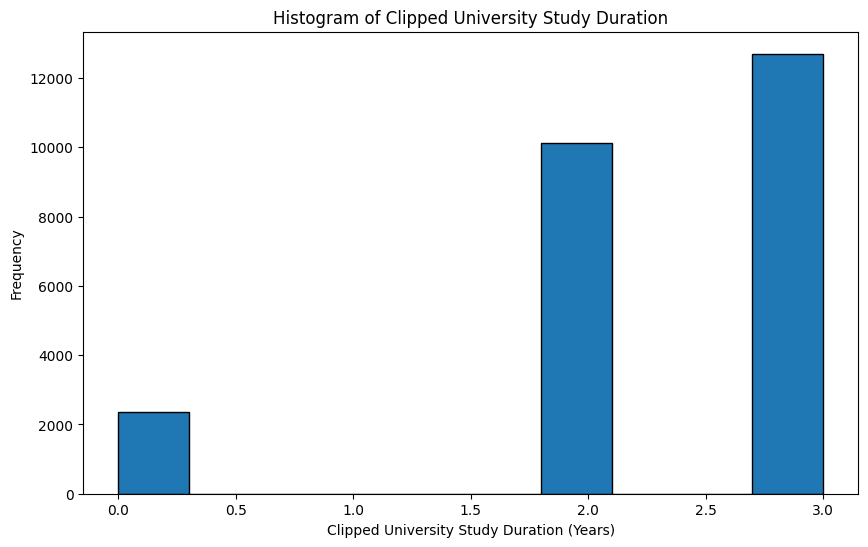

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk as nltk
import PIL as pil


df = pd.read_csv("surveyDataSience.csv", low_memory=False)

studii_superioare_map = {
    'Master’s degree': 2,
    'Bachelor’s degree': 3,
    'Doctoral degree': 3,
    'Some college/university study without earning a bachelor’s degree':0,
    'I prefer not to answer':0
}

df['Q4_mapped'] = df['Q4'].map(studii_superioare_map)

min_value = df['Q4_mapped'].min()
max_value = df['Q4_mapped'].max()

df['Q4_clipped'] = df['Q4_mapped'].clip(lower=min_value, upper=max_value)

print(df[['Q4', 'Q4_mapped', 'Q4_clipped']].head())

plt.figure(figsize=(10, 6))
plt.hist(df['Q4_mapped'], bins=10, edgecolor='black')
plt.xlabel('Mapped University Study Duration (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Mapped University Study Duration')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Q4_clipped'], bins=10, edgecolor='black')
plt.xlabel('Clipped University Study Duration (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Clipped University Study Duration')
plt.show()


                                                  Q6  Q6_mapped  Q6_log_scaled
0  For how many years have you been writing code ...        NaN            NaN
1                                         5-10 years        7.5       2.140066
2                                          20+ years       25.0       3.258097
3                                          1-3 years        2.0       1.098612
4                                          20+ years       25.0       3.258097


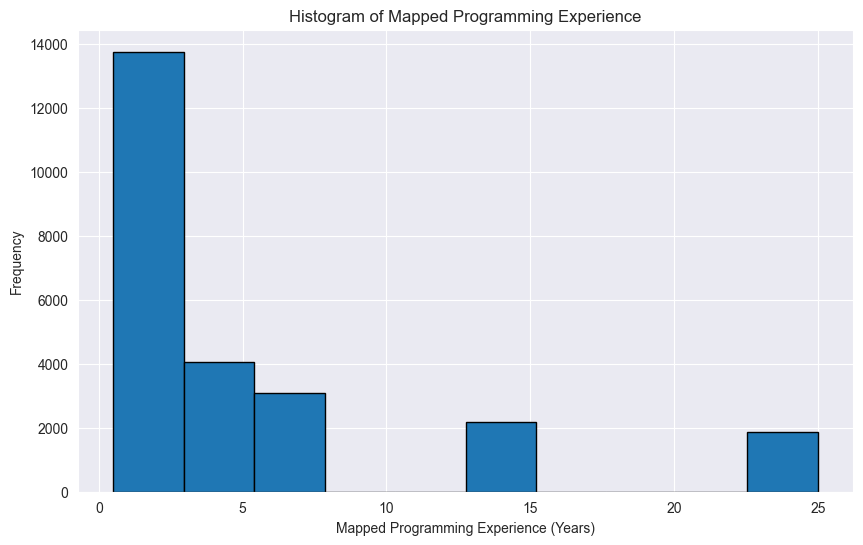

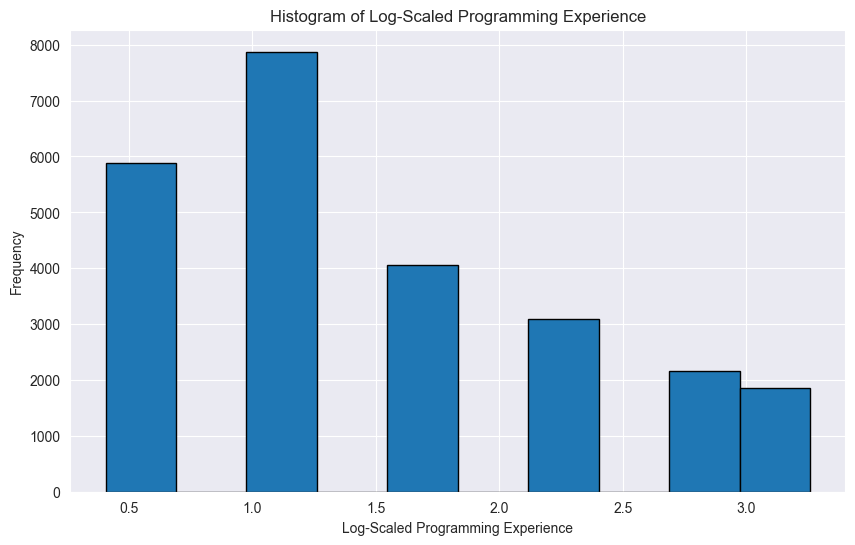

In [11]:
experienta_map = {
    '< 1 years': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 25
}

df['Q6_mapped'] = df['Q6'].map(experienta_map)

df['Q6_log_scaled'] = np.log1p(df['Q6_mapped'])

# Display the log-scaled values
print(df[['Q6', 'Q6_mapped', 'Q6_log_scaled']].head())

plt.figure(figsize=(10, 6))
plt.hist(df['Q6_mapped'], bins=10, edgecolor='black')
plt.xlabel('Mapped Programming Experience (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Mapped Programming Experience')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Q6_log_scaled'], bins=10, edgecolor='black')
plt.xlabel('Log-Scaled Programming Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Scaled Programming Experience')
plt.show()

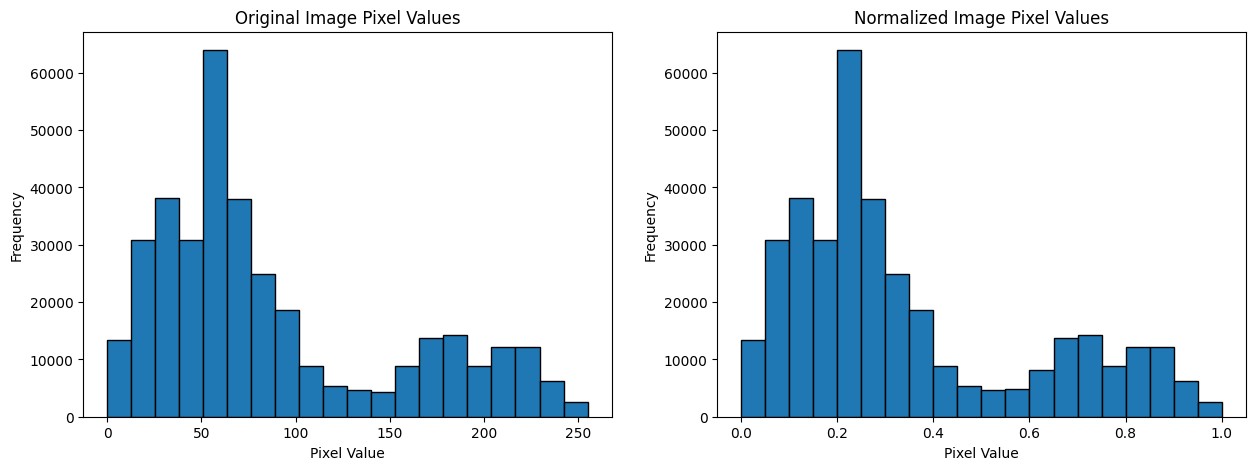

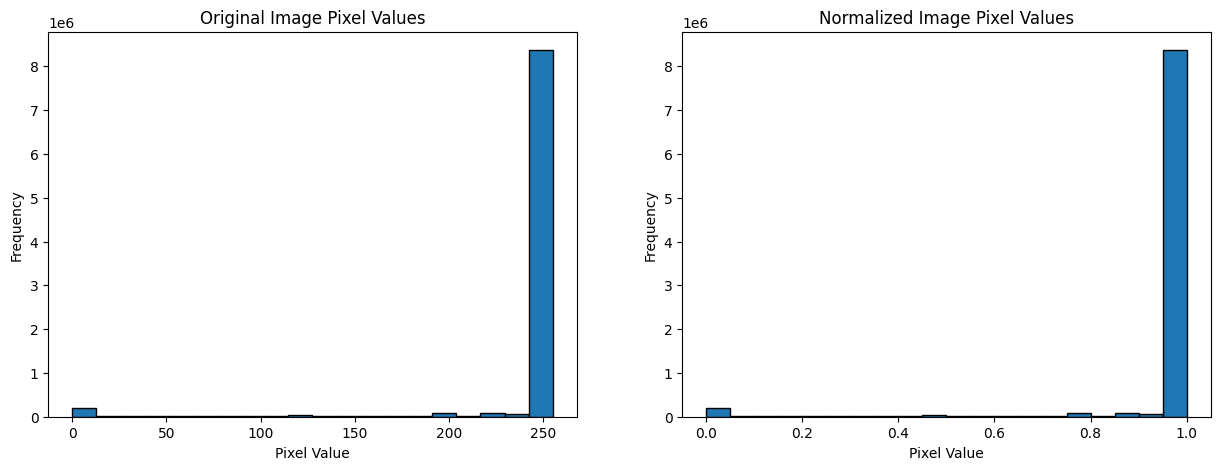

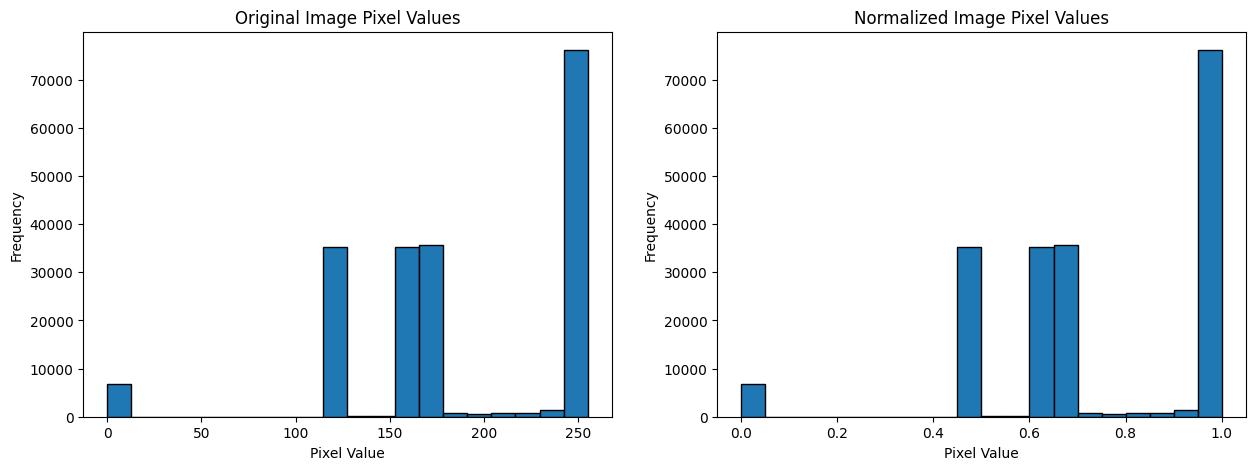

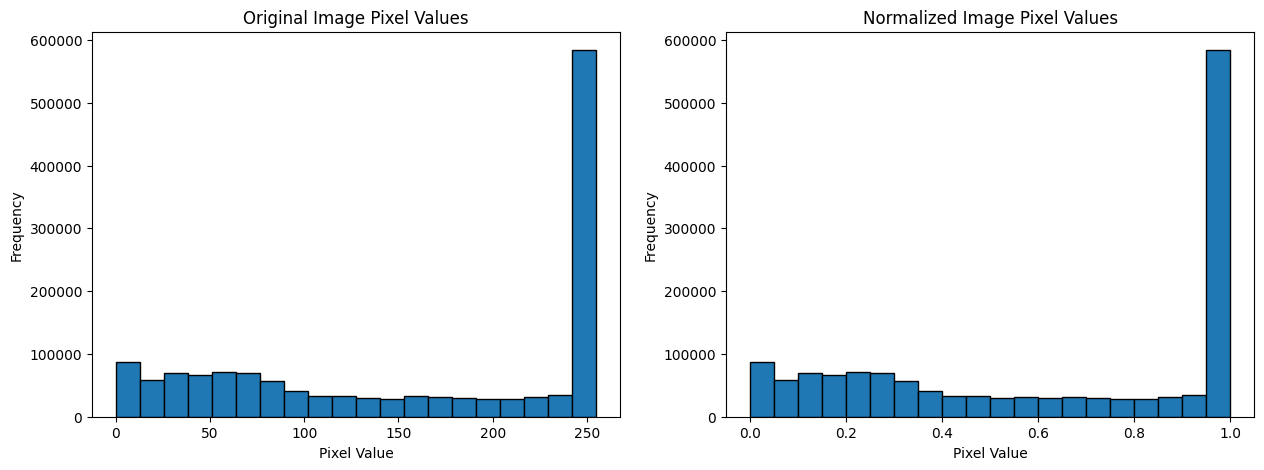

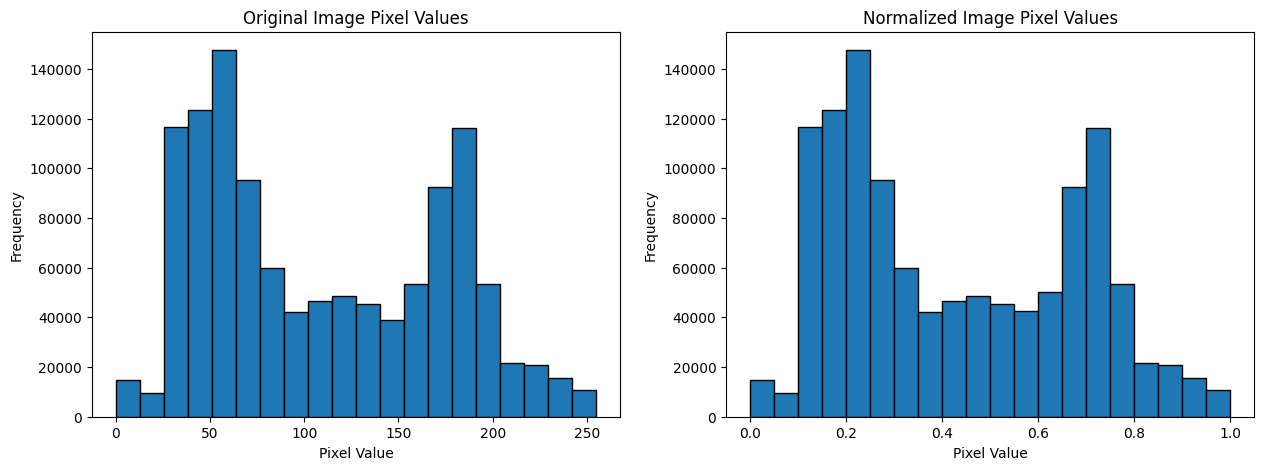

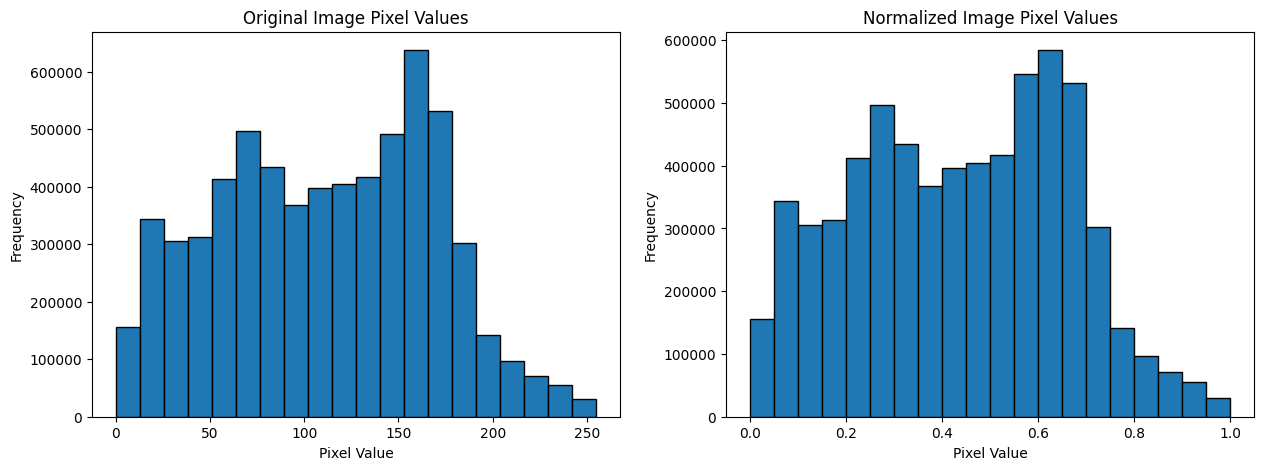

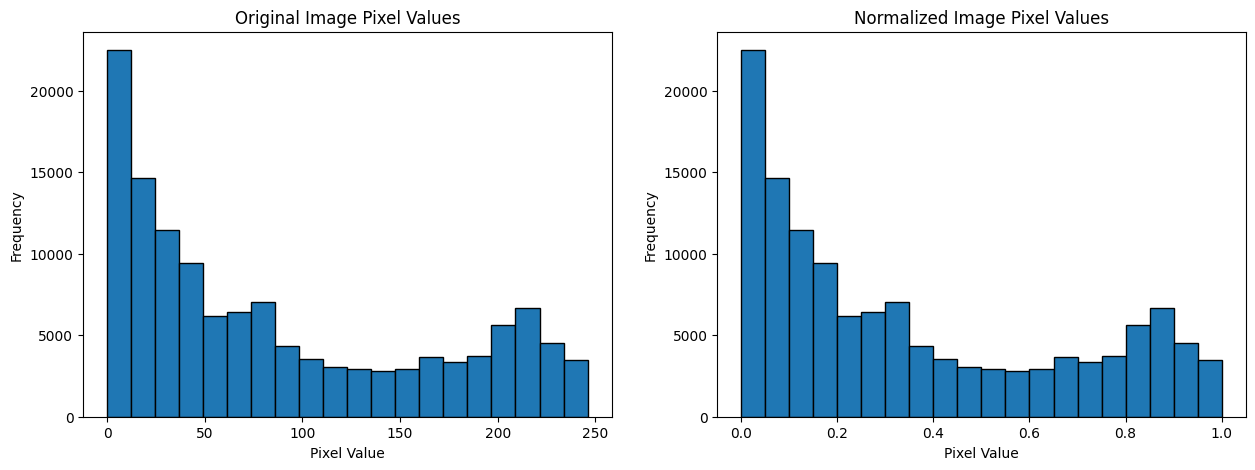

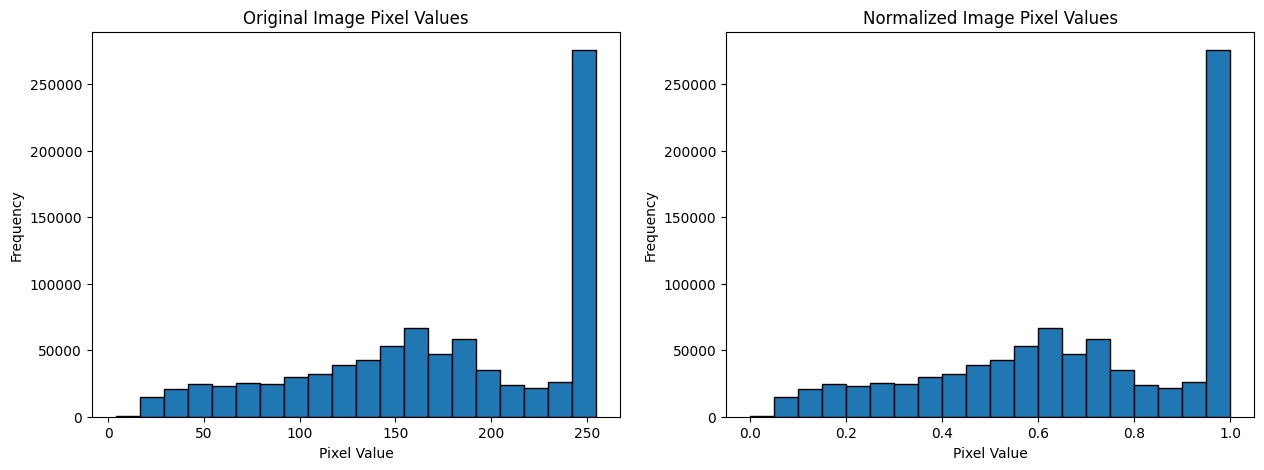

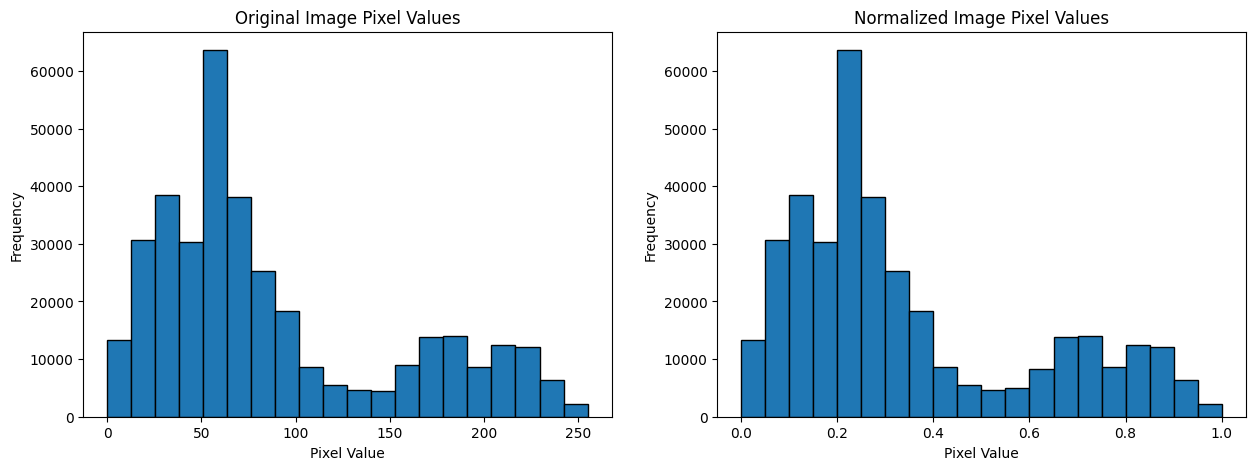

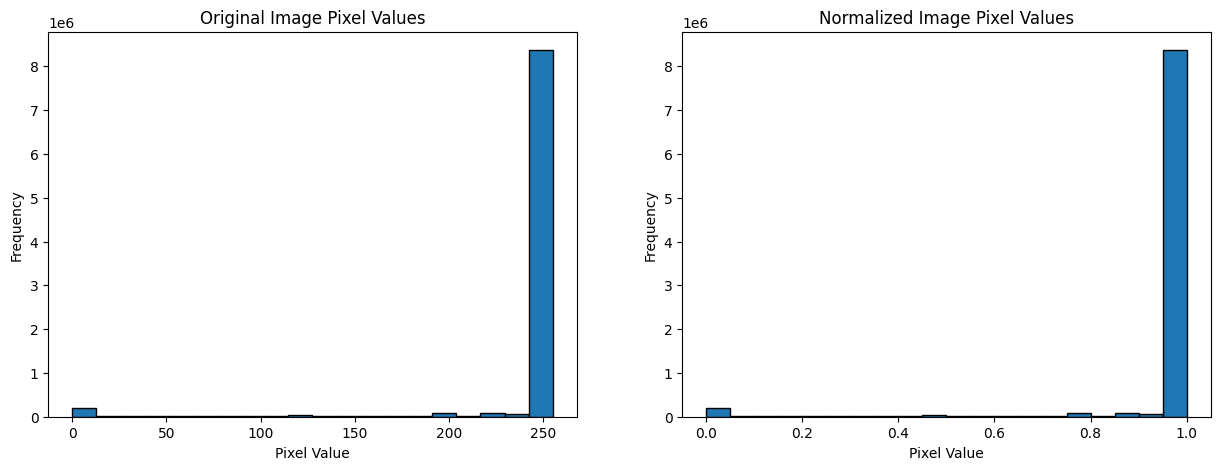

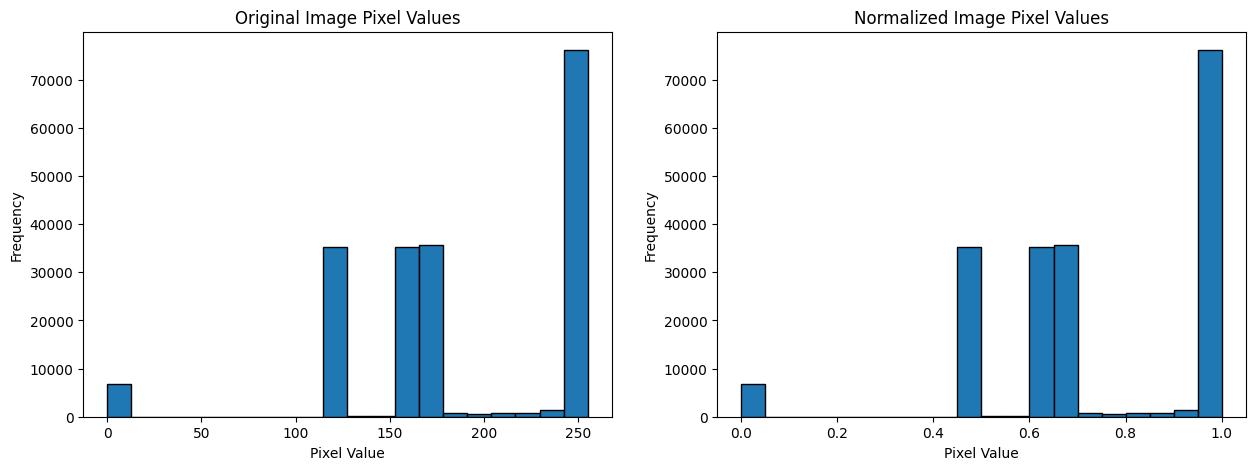

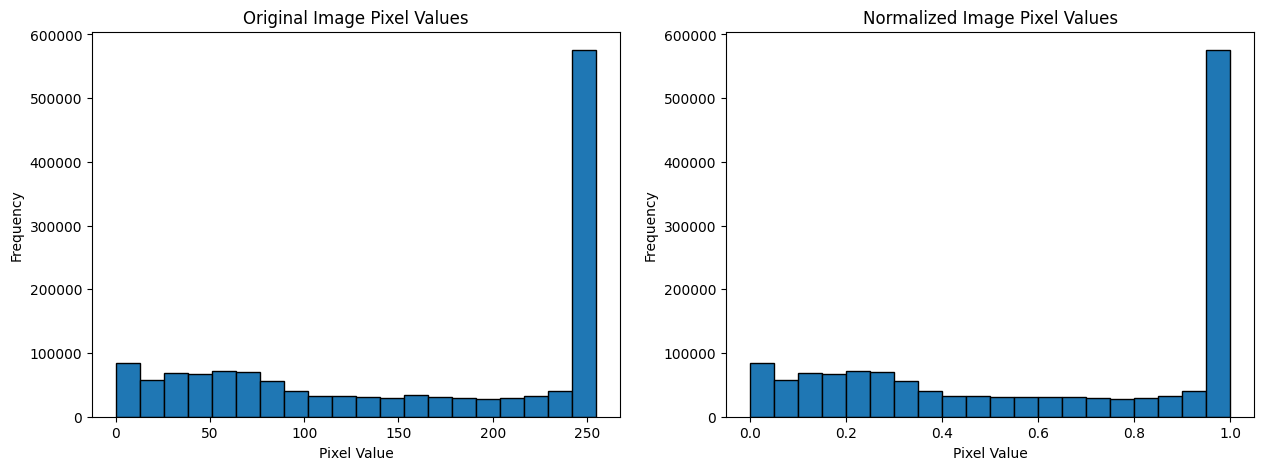

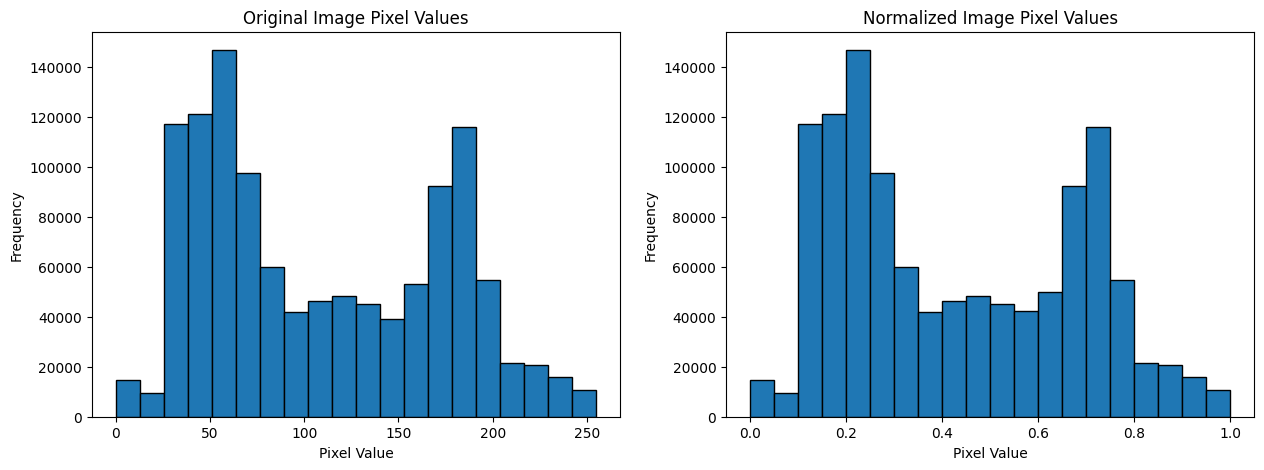

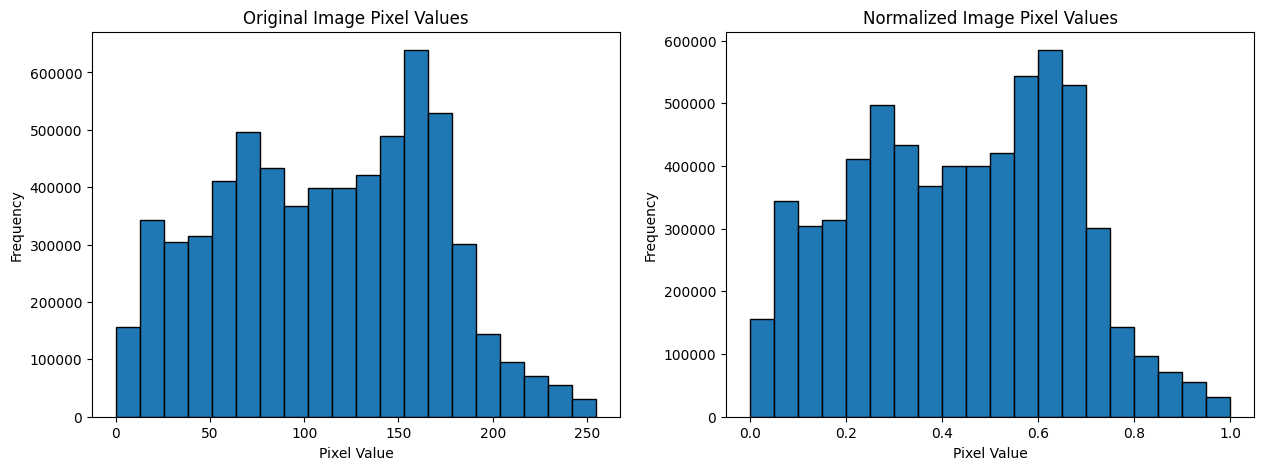

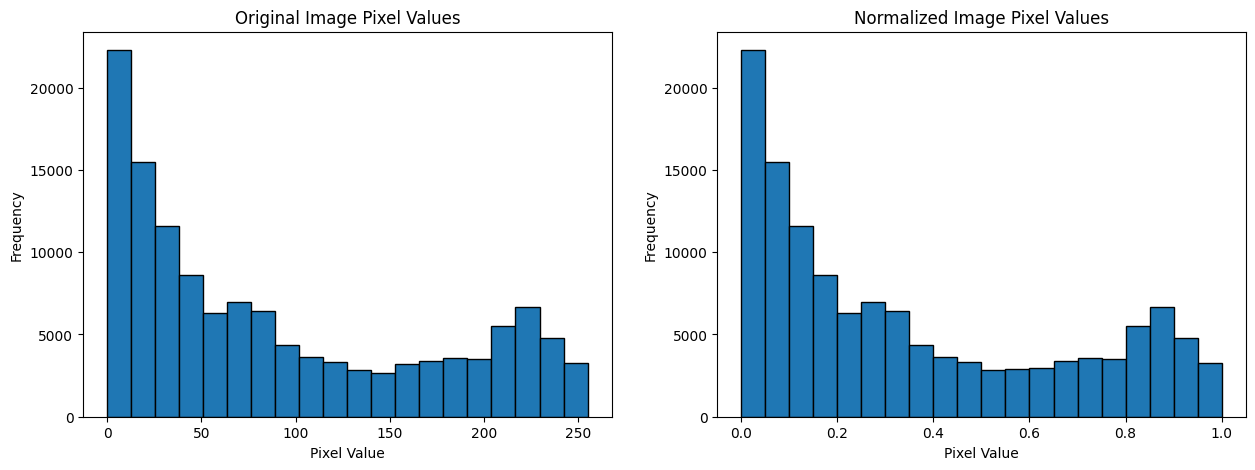

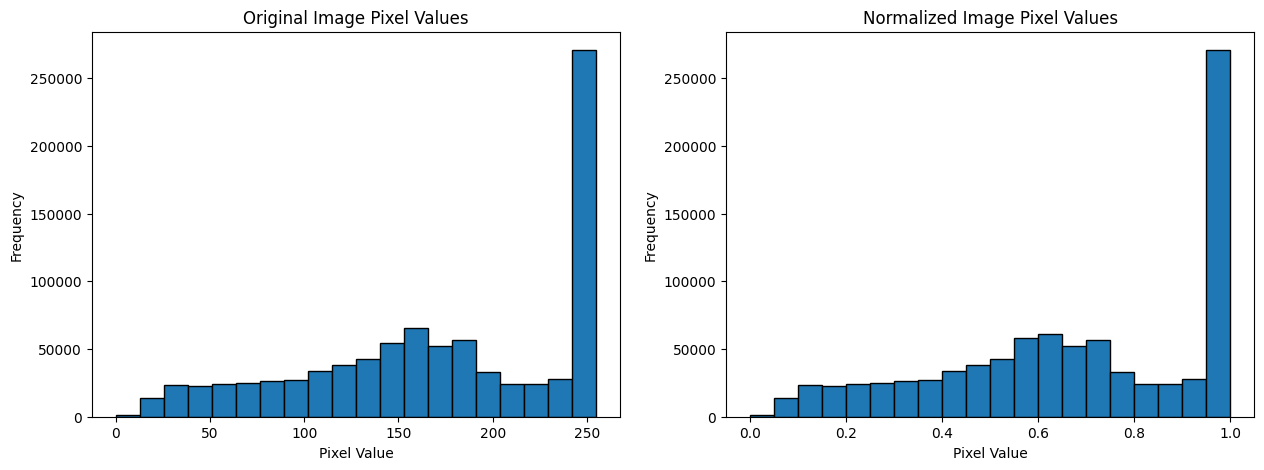

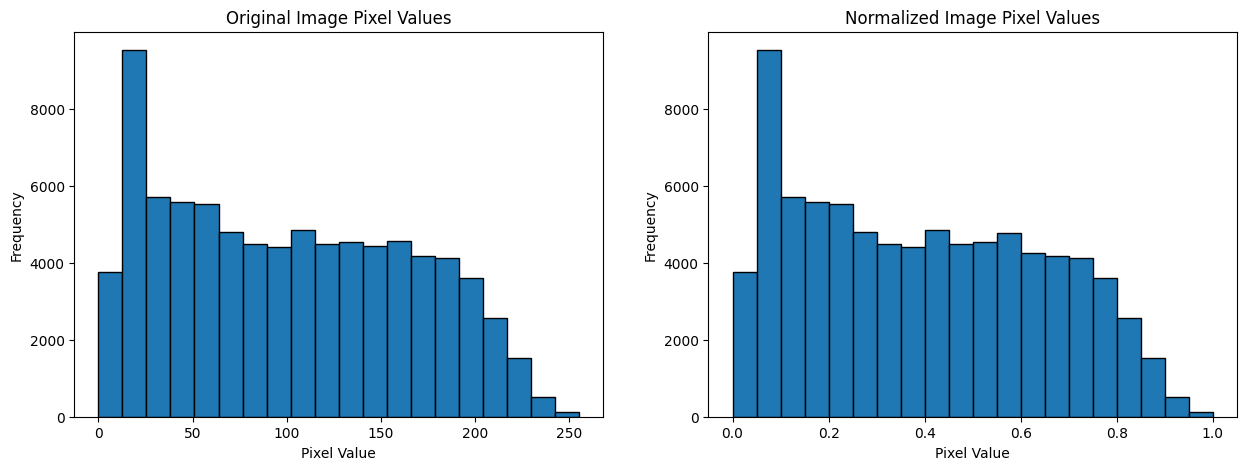

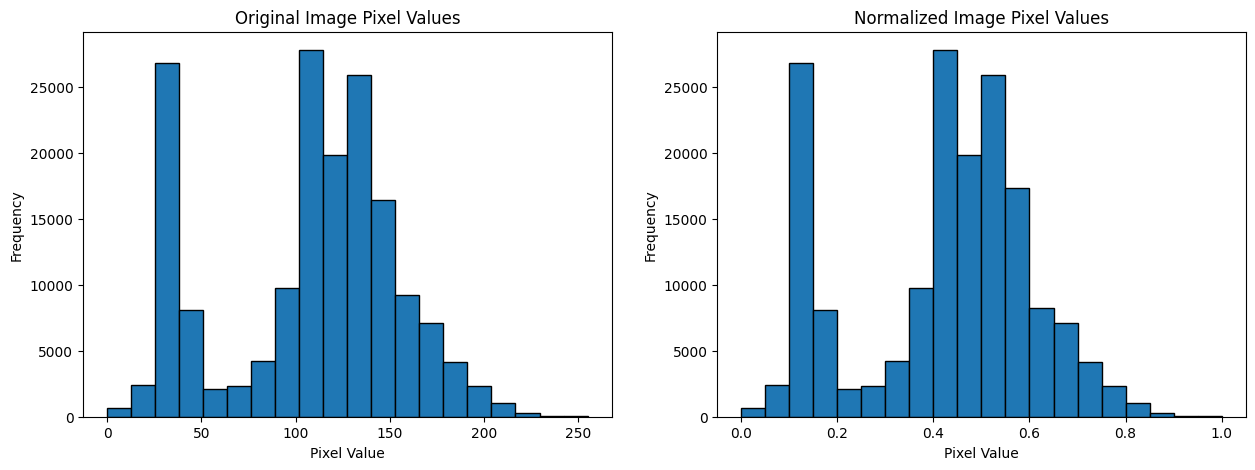

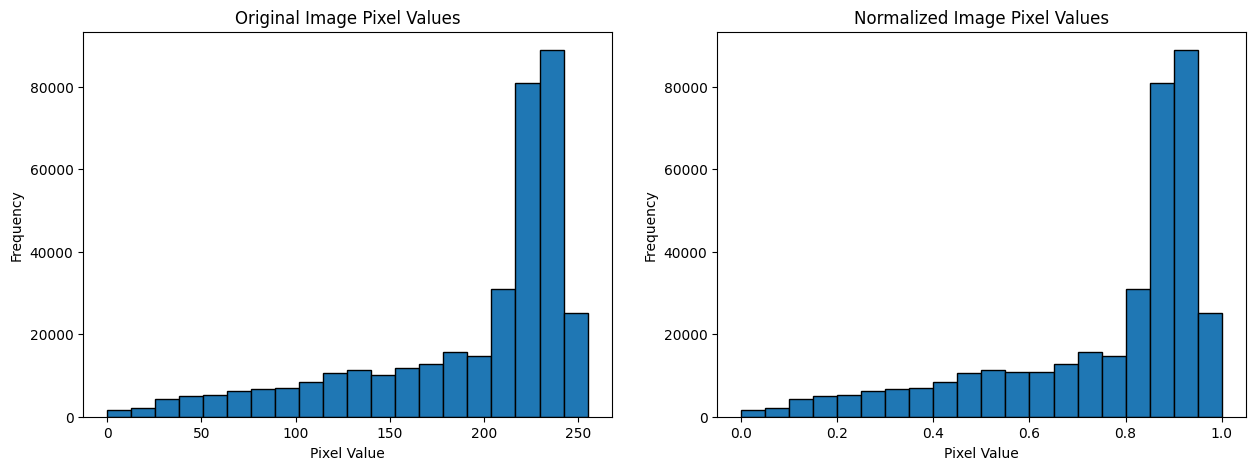

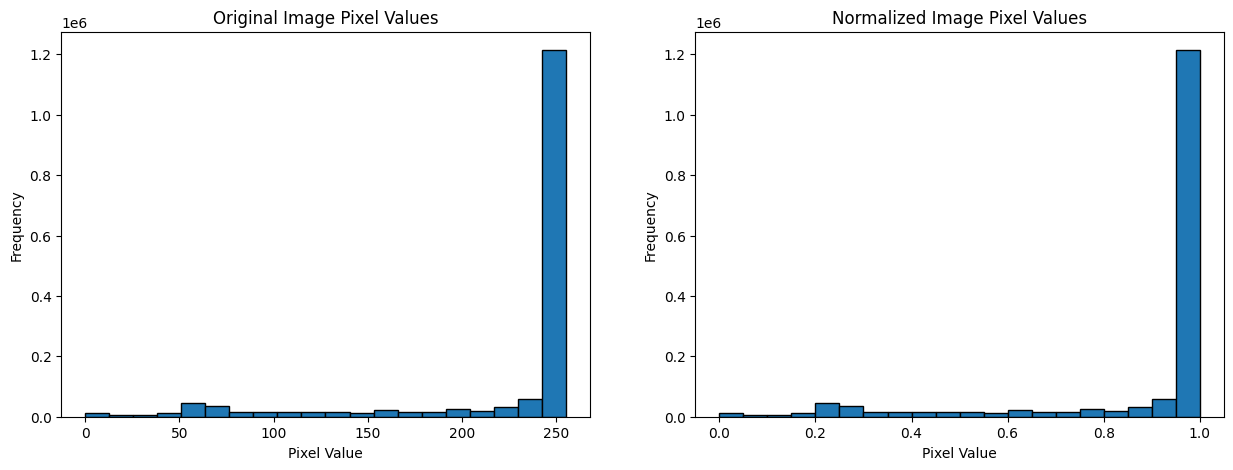

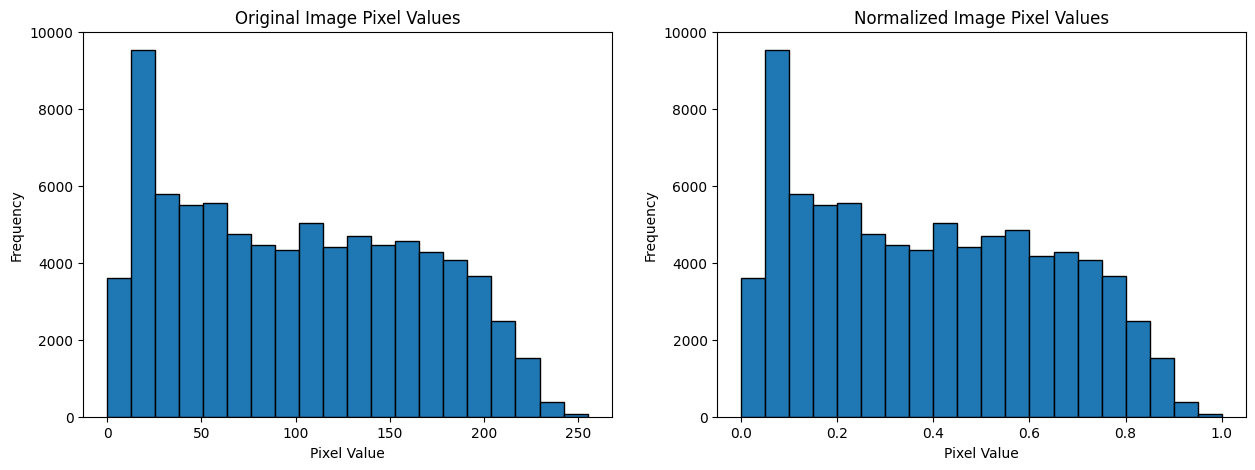

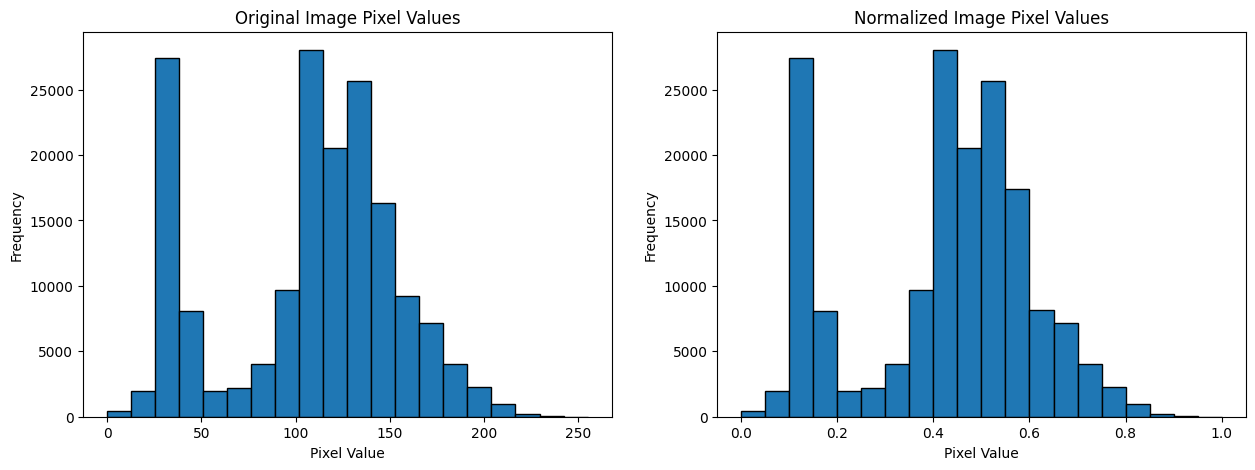

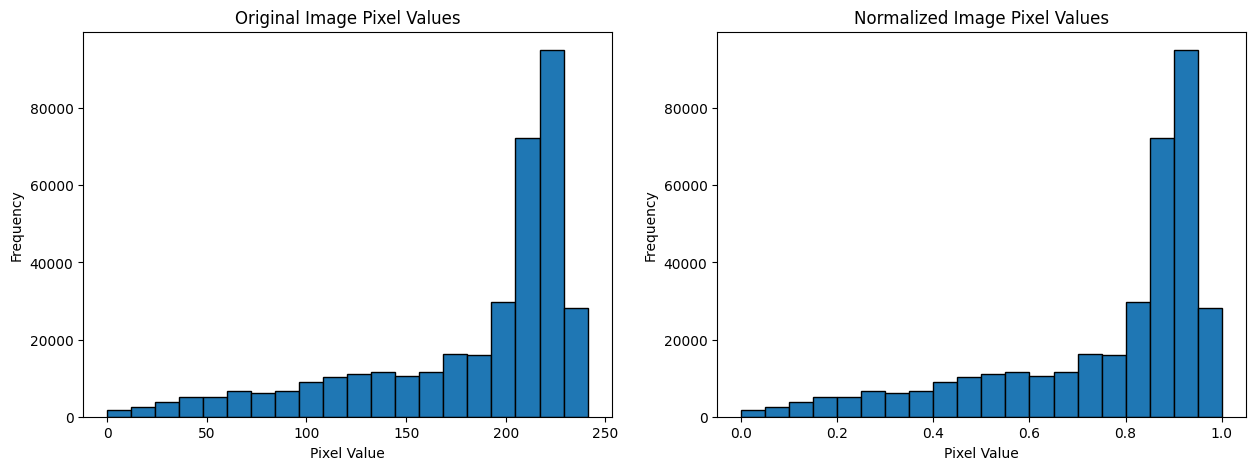

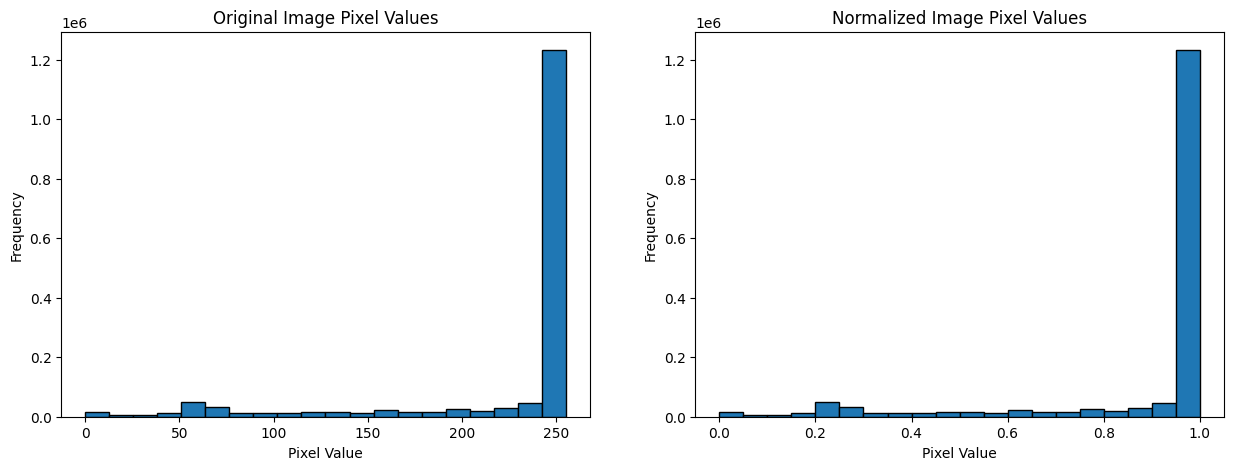

In [8]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def normalize_image(image_array):
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    normalized_array = (image_array - min_val) / (max_val - min_val)
    return normalized_array

images_folder = 'C:/Users/munte/PycharmProjects/AI/images'

image_files = os.listdir(images_folder)

for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    image = Image.open(image_path)

    image_array = np.array(image)

    normalized_image_array = normalize_image(image_array)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.hist(image_array.flatten(), bins=20, edgecolor='black')
    ax1.set_title('Original Image Pixel Values')
    ax1.set_xlabel('Pixel Value')
    ax1.set_ylabel('Frequency')

    ax2.hist(normalized_image_array.flatten(), bins=20, edgecolor='black')
    ax2.set_title('Normalized Image Pixel Values')
    ax2.set_xlabel('Pixel Value')
    ax2.set_ylabel('Frequency')

    plt.show()

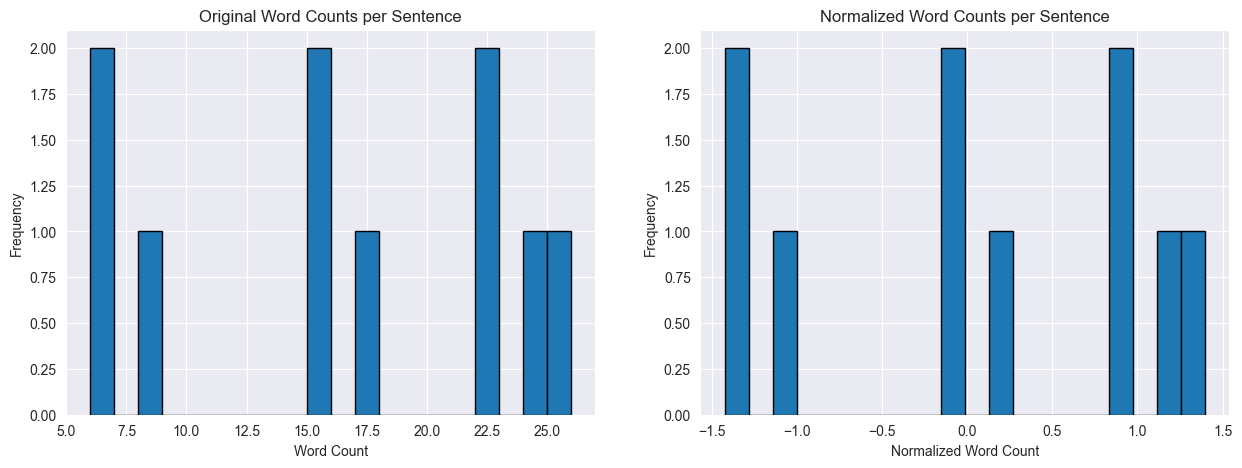

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from nltk import sent_tokenize, word_tokenize

file_path = 'C:/Users/munte/PycharmProjects/AI/texts.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

sentences = sent_tokenize(text)

word_counts = [len(sentence.split()) for sentence in sentences]

mean = np.mean(word_counts)
std = np.std(word_counts)
normalized_word_counts = [(count - mean) / std for count in word_counts]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(word_counts, bins=20, edgecolor='black')
ax1.set_title('Original Word Counts per Sentence')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

ax2.hist(normalized_word_counts, bins=20, edgecolor='black')
ax2.set_title('Normalized Word Counts per Sentence')
ax2.set_xlabel('Normalized Word Count')
ax2.set_ylabel('Frequency')

plt.show()